## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines <mark> in excess of 29 minutes </mark> at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('dataset.csv')
random.seed(414659)
sampled_data = df.sample(frac=0.95)
sampled_data.name = "sampled_data"

In [3]:
sampled_data.head(10)

,Unnamed: 0.1,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
852247,852247,68271,2015,8,3,1,AA,1418,N4YCAA,DFW,...,1,A,NaN,NaN,NaN,NaN,NaN,215,30,Evening
667796,667796,350645,2015,2,14,6,B6,1336,N239JB,DTW,...,0,N,7.0,0.0,84.0,0.0,0.0,45,6,Evening
358937,358937,346636,2015,4,23,4,OO,5418,N976SW,SFO,...,0,N,11.0,0.0,0.0,20.0,0.0,113,16,Evening
502780,502780,604230,2015,12,22,2,F9,669,N223FR,DEN,...,0,N,32.0,0.0,0.0,26.0,0.0,356,50,Morning
454900,454900,768628,2015,2,22,7,UA,453,N469UA,SFO,...,0,N,15.0,0.0,10.0,71.0,0.0,53,7,Afternoon
663400,663400,852133,2015,1,16,5,EV,3261,N13995,ORD,...,0,N,27.0,0.0,0.0,8.0,0.0,16,2,Morning
488220,488220,301799,2015,5,16,6,F9,223,N204FR,AUS,...,0,N,15.0,0.0,0.0,0.0,0.0,136,19,Afternoon
732945,732945,78771,2015,11,15,7,AA,1145,N3MAAA,SFO,...,1,A,NaN,NaN,NaN,NaN,NaN,319,45,Morning
738840,738840,67975,2015,8,2,7,MQ,3419,N820MQ,ORD,...,1,B,NaN,NaN,NaN,NaN,NaN,214,30,Afternoon
544448,544448,85300,2015,12,26,6,WN,4297,N253WN,LAS,...,1,B,NaN,NaN,NaN,NaN,NaN,360,51,Evening


## Insights into the Data

We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. 

### Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled.

In [4]:
unique_points=sampled_data['CANCELLATION_REASON'].unique()
print('unique values for cancellation reason in sampled data: \n', unique_points, "\n")

sampled_data_cancelled=sampled_data[sampled_data['CANCELLED']==1]
sampled_data_not_cancelled=sampled_data[sampled_data['CANCELLED']==0]

UniqueValues_sample_data_c       =  sampled_data_cancelled["CANCELLATION_REASON"].unique()
UniqueValues_sample_data_Notc    =  sampled_data_not_cancelled["CANCELLATION_REASON"].unique()

print('unique values for cancellation reason in sampled data \n where the flights have been cancelled: \n'\
      , UniqueValues_sample_data_c,'\n')
print('unique values for cancellation reason in sampled data \n where the flights have NOT been cancelled: \n'\
      , UniqueValues_sample_data_Notc,'\n')

unique values for cancellation reason in sampled data: 
 ['A' 'N' 'B' 'C' 'D'] 

unique values for cancellation reason in sampled data 
 where the flights have been cancelled: 
 ['A' 'B' 'C' 'D'] 

unique values for cancellation reason in sampled data 
 where the flights have NOT been cancelled: 
 ['N'] 



#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>.

In [5]:
no_null_data=sampled_data.dropna()
unique_points_NoNull=no_null_data['CANCELLATION_REASON'].unique()

print("Uniuqe cancellation reasons in no null data: \n",unique_points_NoNull)

#list(set(list1).intersection(list2))
print('Unique values for cancellation reason in sampled data: \n', unique_points, "\n")
print("Difference in unique values between sampled_data and no_null_data:\n", set(unique_points) - set(unique_points_NoNull))


Uniuqe cancellation reasons in no null data: 
 ['N']
Unique values for cancellation reason in sampled data: 
 ['A' 'N' 'B' 'C' 'D'] 

Difference in unique values between sampled_data and no_null_data:
 {'C', 'B', 'A', 'D'}


#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

In [6]:
ev_data = no_null_data[no_null_data["AIRLINE"]=="EV"]
#we assume that the delay asked is arrival delay
ev_data = ev_data [(ev_data['DEPARTURE_DELAY'] >=120 ) & (ev_data['DEPARTURE_DELAY'] <=360)]

Box plot of ev_data using the LATE_AIRCRAFT_DELAY column: 


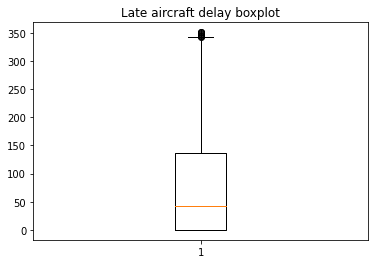

In [7]:
print ("Box plot of ev_data using the LATE_AIRCRAFT_DELAY column: ")
fig1,x1=plt.subplots()
x1.set_title("Late aircraft delay boxplot")
x1.boxplot(ev_data["LATE_AIRCRAFT_DELAY"]);


Box plot of ev_data using the AIR_SYSTEM_DELAY column: 


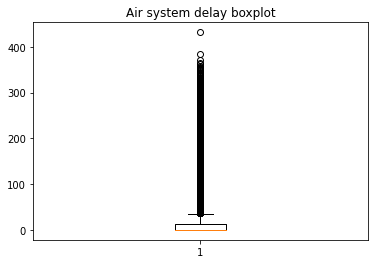

In [8]:
print ("Box plot of ev_data using the AIR_SYSTEM_DELAY column: ")
fig2,x2=plt.subplots()
x2.set_title("Air system delay boxplot")
x2.boxplot(ev_data["AIR_SYSTEM_DELAY"]);

In [9]:
cleaned_data_late_aircraft_Q25 = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.25)
cleaned_data_late_aircraft_Q75 = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.75)
IQR = cleaned_data_late_aircraft_Q75 - cleaned_data_late_aircraft_Q25

filter = (ev_data['LATE_AIRCRAFT_DELAY'] >= cleaned_data_late_aircraft_Q25 - 1.5 * IQR) & (ev_data['LATE_AIRCRAFT_DELAY'] <= cleaned_data_late_aircraft_Q75 + 1.5 * IQR)

cleaned_data_late_aircraft = ev_data.loc[filter]
###
###
cleaned_data_Air_System_Delay_Q25 = ev_data['AIR_SYSTEM_DELAY'].quantile(0.25)
cleaned_data_Air_System_Delay_Q75 = ev_data['AIR_SYSTEM_DELAY'].quantile(0.75)
IQR = cleaned_data_Air_System_Delay_Q75 - cleaned_data_Air_System_Delay_Q25

filter = (ev_data['AIR_SYSTEM_DELAY'] >= cleaned_data_Air_System_Delay_Q25 - 1.5 * IQR) & (ev_data['AIR_SYSTEM_DELAY'] <= cleaned_data_Air_System_Delay_Q75 + 1.5 * IQR)

cleaned_data_air_system= ev_data.loc[filter]

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>.

In [10]:
ev_data.name = "ev_data"
cleaned_data_late_aircraft.name = "cleaned_data_late_aircraft"
cleaned_data_air_system.name = "cleaned_data_air_system"

# Print statistical features of arrival delay in the ev_data dataset
print("Statistics for ev_data")
print("Median:", ev_data['ARRIVAL_DELAY'].median())
print("Mean:", ev_data['ARRIVAL_DELAY'].mean())
print("Mode:", ev_data['ARRIVAL_DELAY'].mode())
print("Standard deviation:", ev_data['ARRIVAL_DELAY'].std())
print("Variance:", ev_data['ARRIVAL_DELAY'].var())

# Print statistical features of arrival delay in the cleaned_data_late_aircraft dataset
print("\nStatistics for cleaned_data_late_aircraft")
print("Median:", cleaned_data_late_aircraft['ARRIVAL_DELAY'].median())
print("Mean:", cleaned_data_late_aircraft['ARRIVAL_DELAY'].mean())
print("Mode:", cleaned_data_late_aircraft['ARRIVAL_DELAY'].mode())
print("Standard deviation:", cleaned_data_late_aircraft['ARRIVAL_DELAY'].std())
print("Variance:", cleaned_data_late_aircraft['ARRIVAL_DELAY'].var())

# Print statistical features of arrival delay in the cleaned_data_air_system dataset
print("\nStatistics for cleaned_data_air_system")
print("Median:", cleaned_data_air_system['ARRIVAL_DELAY'].median())
print("Mean:", cleaned_data_air_system['ARRIVAL_DELAY'].mean())
print("Mode:", cleaned_data_air_system['ARRIVAL_DELAY'].mode())
print("Standard deviation:", cleaned_data_air_system['ARRIVAL_DELAY'].std())
print("Variance:", cleaned_data_air_system['ARRIVAL_DELAY'].var())


Statistics for ev_data
Median: 166.0
Mean: 181.0964
Mode: 0    130.0
Name: ARRIVAL_DELAY, dtype: float64
Standard deviation: 57.85009222427425
Variance: 3346.633170357036

Statistics for cleaned_data_late_aircraft
Median: 166.0
Mean: 180.9605684547638
Mode: 0    130.0
Name: ARRIVAL_DELAY, dtype: float64
Standard deviation: 57.673392865491046
Variance: 3326.2202446172732

Statistics for cleaned_data_air_system
Median: 162.0
Mean: 177.59279711884753
Mode: 0    130.0
1    136.0
2    138.0
3    145.0
Name: ARRIVAL_DELAY, dtype: float64
Standard deviation: 56.15734242853508
Variance: 3153.6471086357465


### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>.
 Just based on this information, if you prefer the minimum delay, which two months would be
 a good option to book a ticket and which two months are the worst.

In [11]:
no_null_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY'],
      dtype='object')

In [12]:
no_null_data2 = no_null_data[["MONTH","ARRIVAL_DELAY"]]
no_null_data2

,MONTH,ARRIVAL_DELAY
667796,2,91.0
358937,4,31.0
502780,12,58.0
454900,2,96.0
663400,1,35.0
...,...,...
583391,8,15.0
243082,8,81.0
258873,7,18.0
40455,7,17.0


   Month   mean_val
0    Jan  56.496314
1    Feb  59.195382
2    Mar  56.856262
3    Apr  56.067395
4    May  60.531391
5    Jun  63.646937
6    Jul  59.437766
7    Aug  59.733499
8    Sep  54.892716
9    Okt  55.110199
10   Nov  57.538299
11   Dec  62.685454


<AxesSubplot: xlabel='Month'>

<Figure size 1500x600 with 0 Axes>

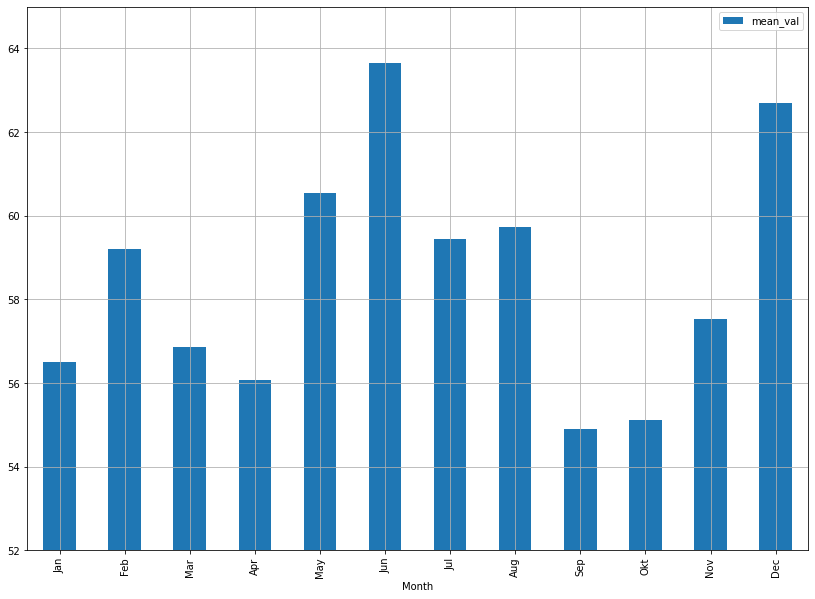

In [13]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]
mean_val = []
for i in range(1,13):
    mean_val.append(no_null_data2[no_null_data2["MONTH"] == i].ARRIVAL_DELAY.mean())

d = {'Month':months,'mean_val':mean_val}
df = pd.DataFrame(d)
print(df)
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=100)
df.plot.bar(x='Month', y='mean_val', figsize=(14,10), grid=True, ylim=(52,65))



    Your answer: For the months September and October we have the minimum delays as it is shown by the graph as well.


#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>.
Which month has the minimum and which month has the maximum average weatherdelay?

In [15]:
no_null_data2 = no_null_data[["MONTH","WEATHER_DELAY"]]
no_null_data2

,MONTH,WEATHER_DELAY
667796,2,0.0
358937,4,0.0
502780,12,0.0
454900,2,0.0
663400,1,0.0
...,...,...
583391,8,0.0
243082,8,0.0
258873,7,0.0
40455,7,0.0


   Month  mean_val
0    Jan  2.755295
1    Feb  4.323220
2    Mar  2.401849
3    Apr  2.697498
4    May  3.731156
5    Jun  3.287915
6    Jul  2.153692
7    Aug  2.831340
8    Sep  2.323585
9    Okt  1.822778
10   Nov  2.707809
11   Dec  3.359807


<AxesSubplot: xlabel='Month'>

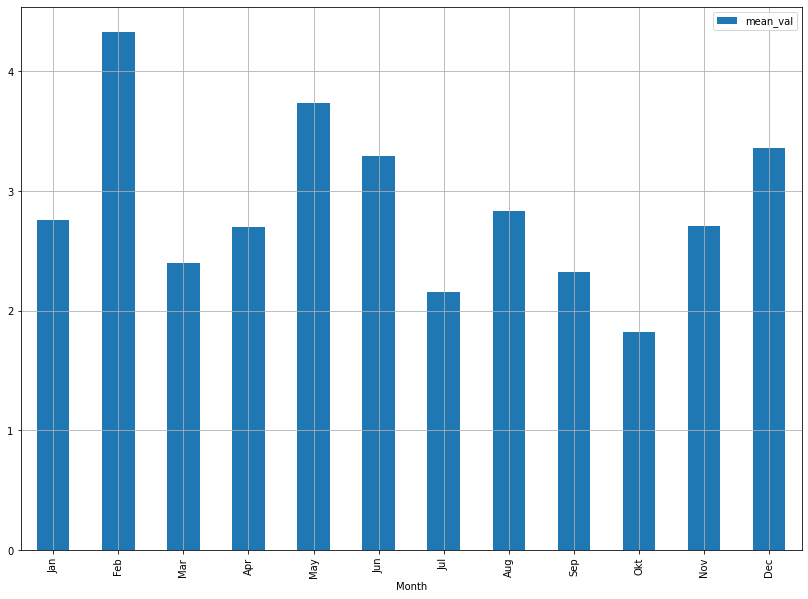

In [19]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]
mean_val = []
for i in range(1,13):
    mean_val.append(no_null_data2[no_null_data2["MONTH"] == i].WEATHER_DELAY.mean())

d = {'Month':months,'mean_val':mean_val}
df = pd.DataFrame(d)
print(df)

df.plot.bar(x='Month', y='mean_val', figsize=(14,10), grid=True)
#print("Maximum Weather Delay:",df.max())
#print("Minimum Weather Delay:",df.min())

    Your answer:
    Maximum Weather Delay:Feb: 4.2830899085605525
    Minimum Weather Delay:Oct: 1.7917250437828371


#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:

    Maximum Arrival Delay: Month             Sep    63.714437
    Minimum Arrival Delay: Month             Apr    54.960263


    Maximum Weather Delay: Month           Sep      4.28309
    Minimum Weather Delay: Month            Apr     1.791725


    Weather delay and Arrival delay are related. When the Arrival delay is maximum then the Weather delay is also maximum and vice-versa.


#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month.
 Based on this information, which combination of days of week and months should be avoided
 to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of
 week and months.

Jan
   Days   mean_val
6     7  61.666524
Feb
   Days   mean_val
6     7  64.512754
Mar
   Days   mean_val
0     1  64.018428
Apr
   Days   mean_val
0     1  61.253047
May
   Days   mean_val
0     1  68.672493
Jun
   Days   mean_val
0     1  69.770569
Jul
   Days   mean_val
5     6  62.627349
Aug
   Days   mean_val
3     4  63.619986
Sep
   Days   mean_val
3     4  60.417604
Okt
   Days   mean_val
4     5  62.701664
Nov
   Days   mean_val
5     6  66.715683
Dec
   Days   mean_val
0     1  70.851584
[60.41760380622837, 61.2530468911382, 61.66652441106179, 62.62734931950745, 62.701663849096896, 63.61998560892247, 64.01842791911285, 64.512753774076, 66.71568278805121, 68.67249253469173, 69.77056899934598, 70.8515837954695]


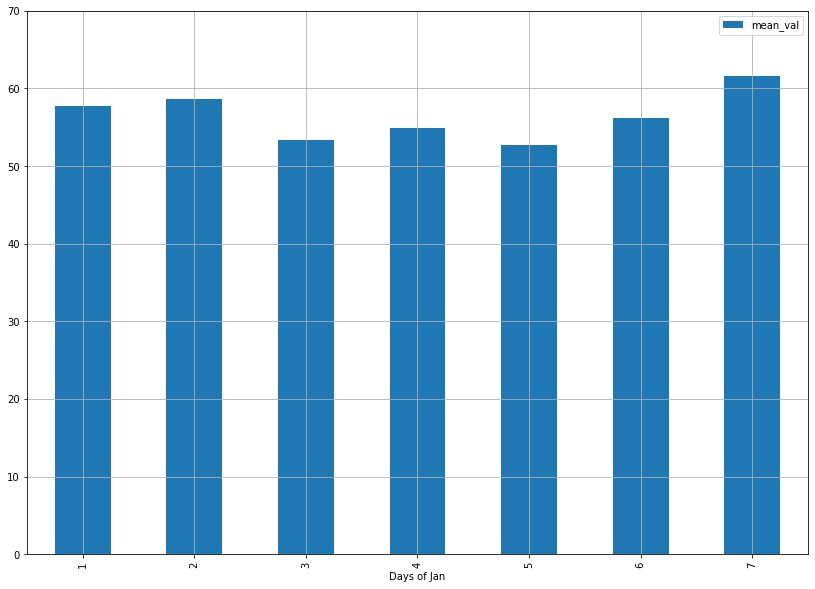

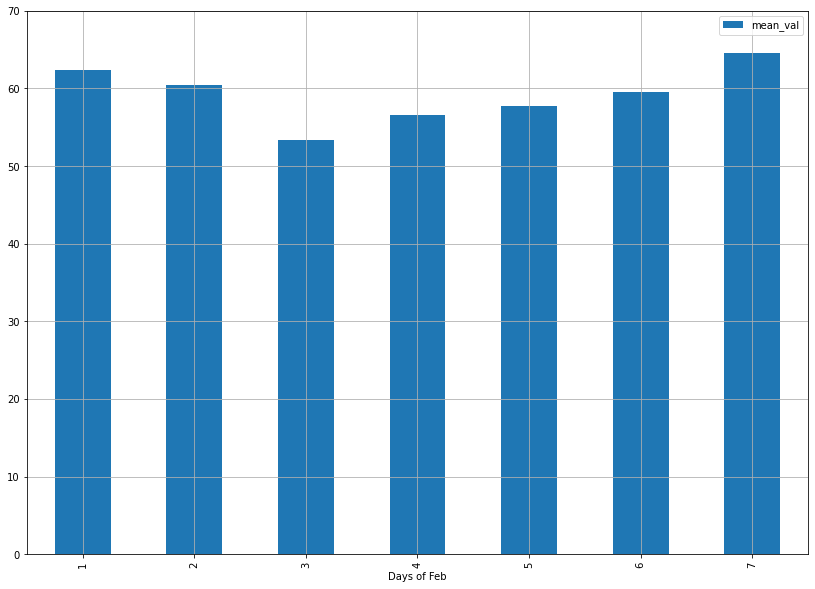

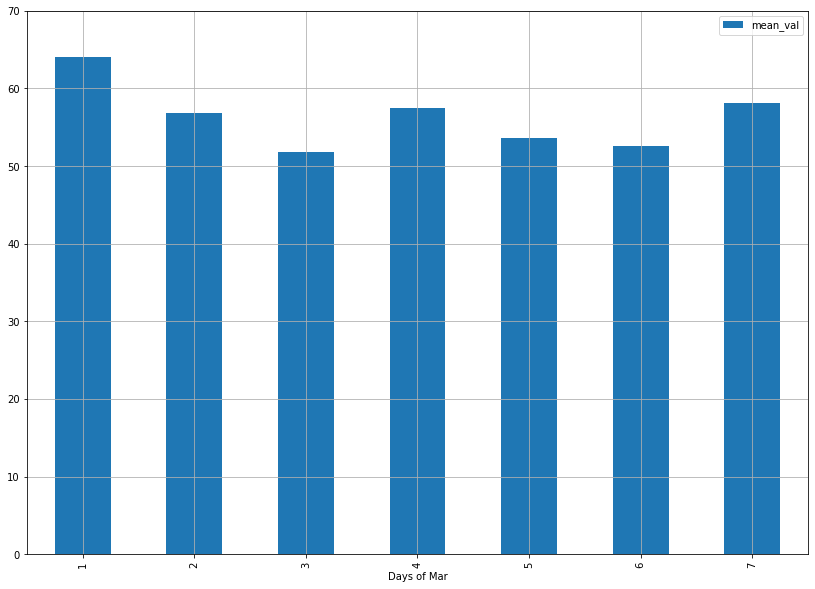

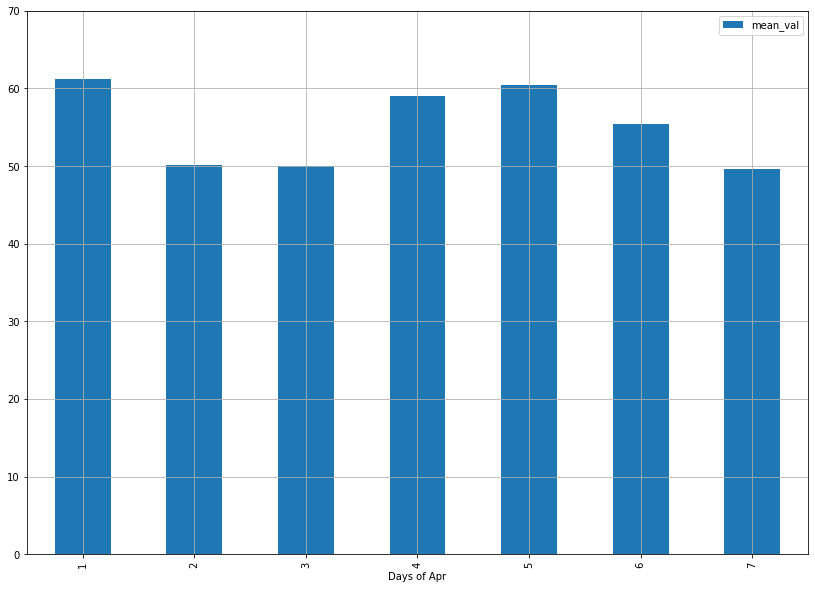

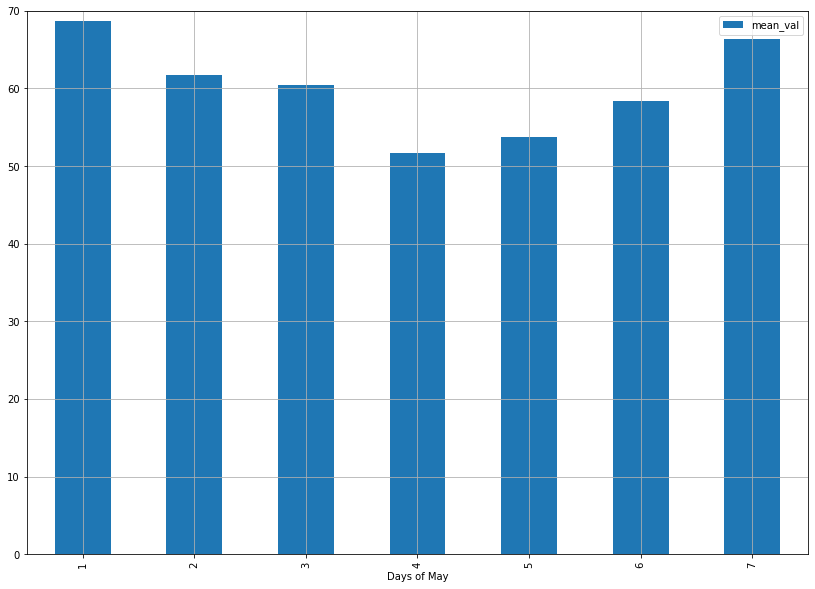

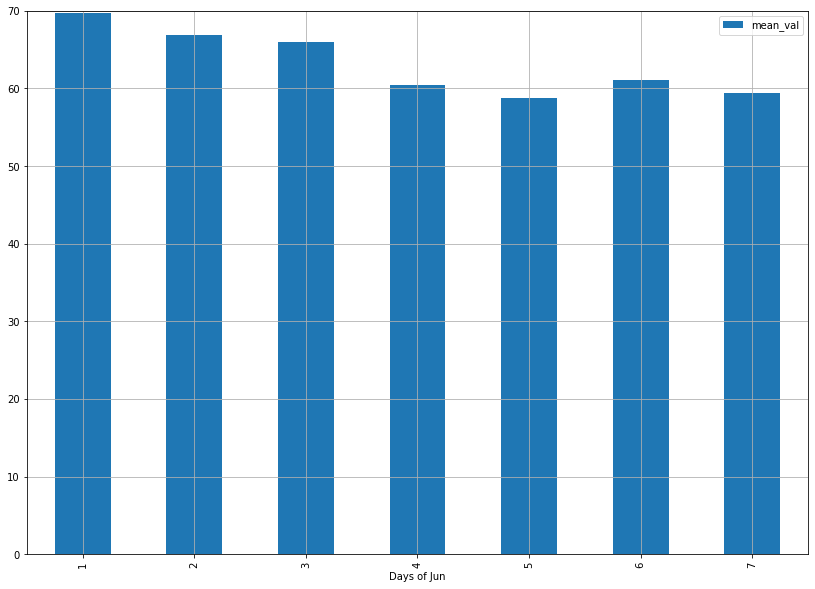

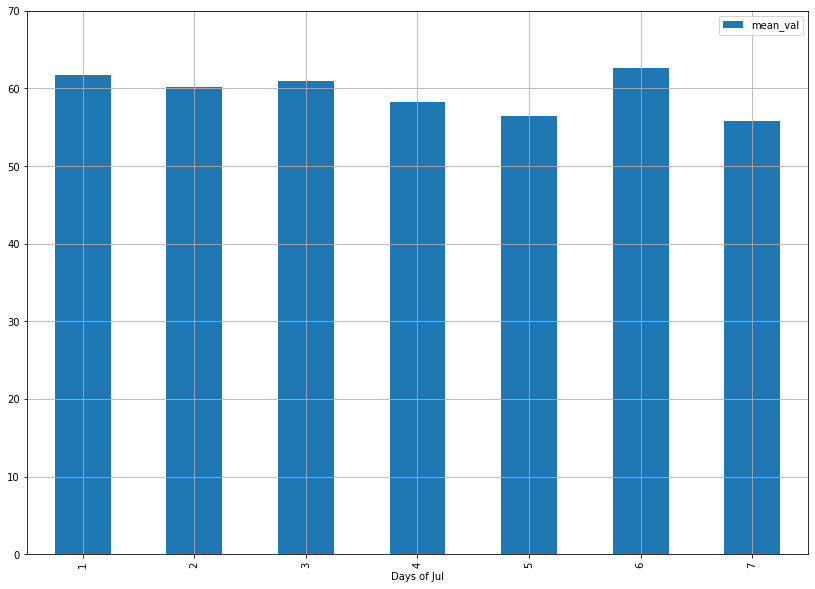

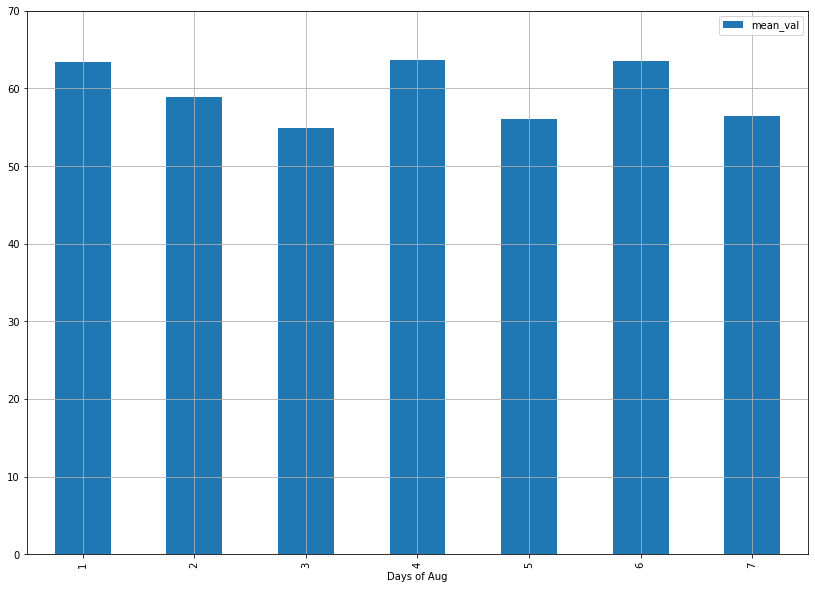

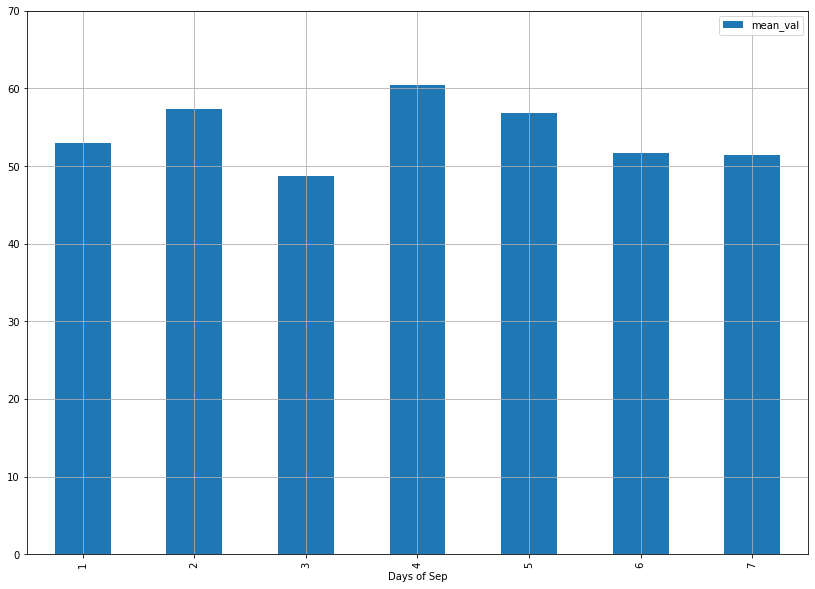

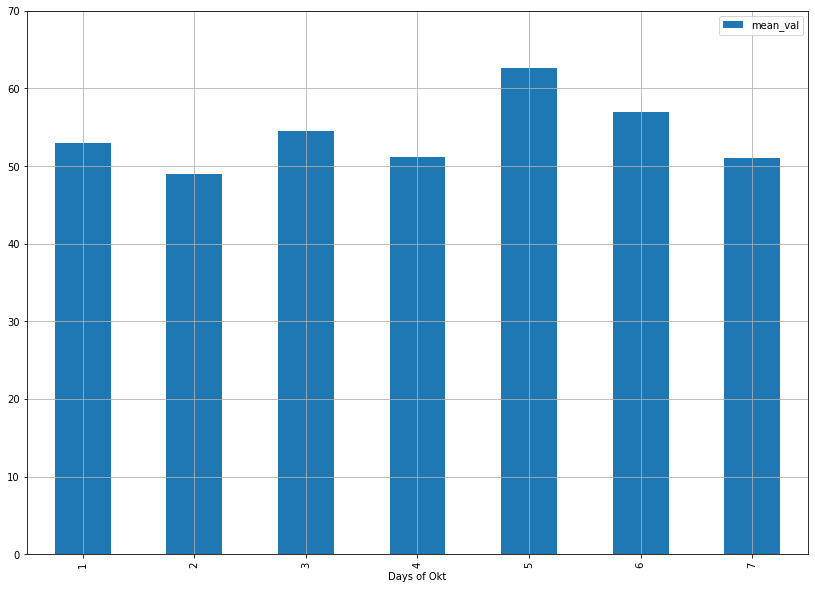

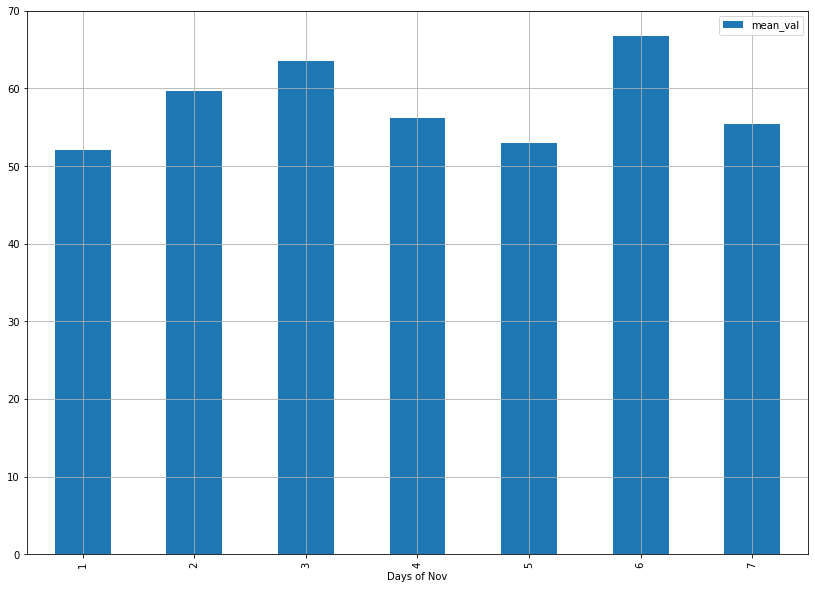

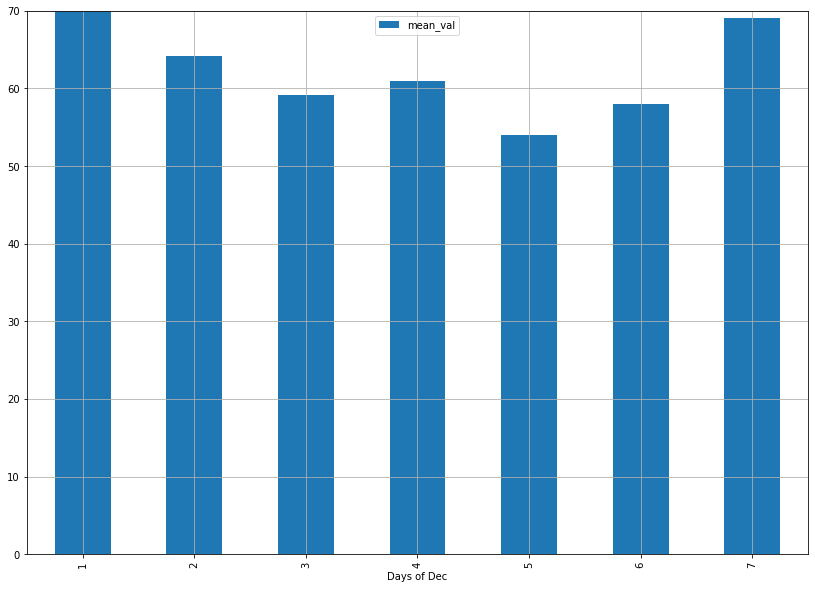

In [21]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]
combination = []


# Your code
for (i,j) in zip(range(1, 13), months):
    Days = [1, 2, 3, 4, 5, 6, 7]
    no_null_data3 = no_null_data[no_null_data['MONTH']==i]
    week_data = []
    for k in range(1,8):
        no_null_data3_week = no_null_data3[no_null_data3['DAY_OF_WEEK']==k]
        week_data.append(no_null_data3_week.ARRIVAL_DELAY.mean())
    d = {'Days':Days,'mean_val':week_data}
    print(j)
    df = pd.DataFrame(d)
    #print(df)
    combination.append(df.mean_val.max())
    x = df[df['mean_val'] == df.mean_val.max()]
    print(x)
    df.plot.bar(x='Days', y='mean_val', figsize=(14,10), grid=True, ylim = (0, 70), xlabel = f'Days of {j}')
print(sorted(combination))

    Your answer: The 5 combination
            Days   mean_val
       Dec        1  70.977615
       Jun        1  69.761003
       May        1  68.834241
       Nov        6  66.749157
       Feb        7  65.083784

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.


In [22]:
no_null_data[no_null_data["WEATHER_DELAY"]!=0]["WEATHER_DELAY"]

719295     27.0
35532     277.0
62719      54.0
560850     30.0
872919    141.0
          ...  
885433     82.0
591661    116.0
203236    117.0
239301     15.0
757081     11.0
Name: WEATHER_DELAY, Length: 49220, dtype: float64

<AxesSubplot: ylabel='Frequency'>

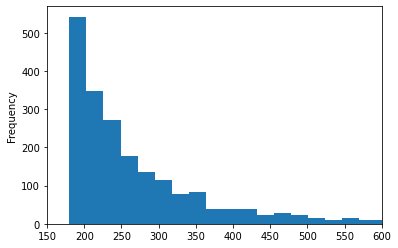

In [23]:
# Your code
no_null_data_dist = no_null_data[no_null_data["WEATHER_DELAY"] >=180 ]
no_null_data_dist["WEATHER_DELAY"].plot.hist(bins=45, xlim=(150,600))


#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

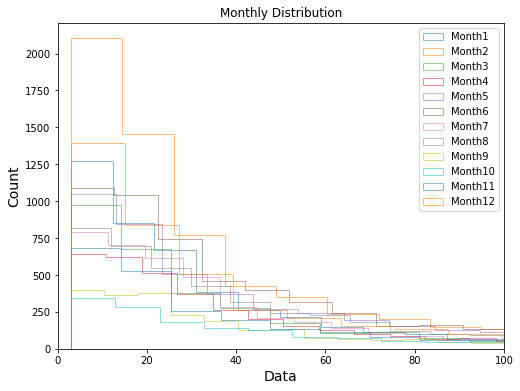

In [29]:
# Your code
# no_null_data_dist_month = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==1)]
# no_null_data_dist_month
# fig, axes = plt.subplots(4, 3)
no_null_data_dist_month1 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==1)]
no_null_data_dist_month2 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==2)]
no_null_data_dist_month3 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==3)]
no_null_data_dist_month4 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==4)]
no_null_data_dist_month5 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==5)]
no_null_data_dist_month6 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==6)]
no_null_data_dist_month7 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==7)]
no_null_data_dist_month8 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==8)]
no_null_data_dist_month9 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==9)]
no_null_data_dist_month10 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==10)]
no_null_data_dist_month11 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==11)]
no_null_data_dist_month12 = no_null_data[(no_null_data["WEATHER_DELAY"] >=3) & (no_null_data["MONTH"] ==12)]

plt.figure(figsize=(8,6))
plt.hist(no_null_data_dist_month1["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month1", histtype='step')
plt.hist(no_null_data_dist_month2["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month2", histtype='step')
plt.hist(no_null_data_dist_month3["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month3", histtype='step')
plt.hist(no_null_data_dist_month4["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month4", histtype='step')
plt.hist(no_null_data_dist_month5["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month5", histtype='step')
plt.hist(no_null_data_dist_month6["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month6", histtype='step')
plt.hist(no_null_data_dist_month7["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month7", histtype='step')
plt.hist(no_null_data_dist_month8["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month8", histtype='step')
plt.hist(no_null_data_dist_month9["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month9", histtype='step')
plt.hist(no_null_data_dist_month10["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month10", histtype='step')
plt.hist(no_null_data_dist_month11["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month11", histtype='step')
plt.hist(no_null_data_dist_month12["WEATHER_DELAY"], bins=100, alpha=0.5, label="Month12", histtype='step')

plt.xlim(0,100)
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Monthly Distribution")
plt.legend(loc='upper right')
plt.show()

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

First plot is for EV airline and second plot is for VX airline


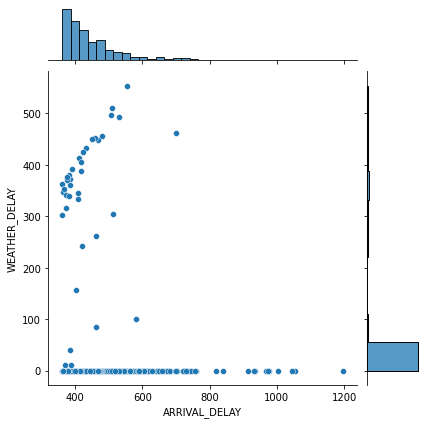

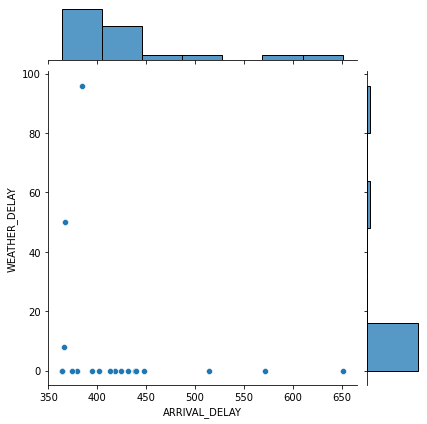

In [30]:
# Your code
# Arrival delay
no_null_data_EV = no_null_data[(no_null_data["AIRLINE"] == 'EV') & (no_null_data["ARRIVAL_DELAY"] >360)]
no_null_data_VX = no_null_data[(no_null_data["AIRLINE"] == 'VX') & (no_null_data["ARRIVAL_DELAY"] > 360)]

print ("First plot is for EV airline and second plot is for VX airline")
sns.jointplot(x="ARRIVAL_DELAY", y="WEATHER_DELAY", data=no_null_data_EV, kind="scatter")


sns.jointplot(x="ARRIVAL_DELAY", y="WEATHER_DELAY", data=no_null_data_VX, kind="scatter")


# plt.figure(figsize=(8,6))
# plt.hist(no_null_data_EV["ARRIVAL_DELAY"], bins=40, alpha=0.5, label="EV", density=True)
# plt.hist(no_null_data_VX["ARRIVAL_DELAY"], bins=40, alpha=0.5, label="VX", density=True)


# plt.xlim(350,700)
# plt.xlabel("Data", size=14)
# plt.ylabel("Count", size=14)
# plt.title("Flight Distribution Arrival delay Normalized")
# plt.legend(loc='upper right')
# plt.show()


    Your answer:  We notice for both airlines an exponential distribution of the arrival delay, with both airlines having most of their cases near our lower limit of 360 mins.
    For weather delay we have very few cases for both companies, since the most common value for both of them is near zero. We notice very few instances of weather delay in the neighborhood of 350 mins for EV airline and under 100 min for VX airline.

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [31]:
# Your code
no_null_data_UA = no_null_data[(no_null_data["AIRLINE"]=="UA") & (no_null_data['ARRIVAL_DELAY'] != 0 )]
no_null_data_UA["DELAY"]=np.where( (no_null_data_UA["ARRIVAL_DELAY"]<=45) , "acceptable_delay","unacceptable_delay")

#for equal width bins we use bin width= (max-min)/2

max_distance = no_null_data_UA["DISTANCE"].max()
min_distance = no_null_data_UA["DISTANCE"].min()
critical_distance = min_distance + (max_distance - min_distance) / 2.

no_null_data_UA["DISTANCE_CATEGORY"]=np.where( (no_null_data_UA["DISTANCE"]>= critical_distance), "long", "short")

#no_null_data_UA.iloc[:100,:]

C:\Users\riyat\AppData\Local\Temp\ipykernel_2236\1253516861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_data_UA["DELAY"]=np.where( (no_null_data_UA["ARRIVAL_DELAY"]<=45) , "acceptable_delay","unacceptable_delay")
C:\Users\riyat\AppData\Local\Temp\ipykernel_2236\1253516861.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_data_UA["DISTANCE_CATEGORY"]=np.where( (no_null_data_UA["DISTANCE"]>= critical_distance), "long", "short")


In [32]:
my=[1,3,3,5,623,4,7]
for i in range(len(my)):
    print (my[i], end="  ")
no_null_data_UA["SCHEDULED_DEPARTURE_CATEGORY"].iloc[0,]

1  3  3  5  623  4  7  

'Afternoon'

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [33]:
# Your code

#import pip
#pip.main(['install', 'p_decision_tree'])
#They were installed in the 1st tutorial of the course

#we will use the dataset no_null_data_UA
from p_decision_tree.DecisionTree import DecisionTree

data=no_null_data_UA.loc[:,["SCHEDULED_DEPARTURE_CATEGORY", "DISTANCE_CATEGORY", "DAY_OF_WEEK" , "DELAY"]]
columns = data.columns
descriptive_features = columns[:-1]
label = columns[-1]

#Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
# for pruning: minimum number of samples for splitting is 1000
decisionTree.id3(0,1000)
dot = decisionTree.print_visualTree( render=True )

#columns[["SCHEDULED_DEPARTURE_CATEGORY"],["DISTANCE_CATEGORY"],["DAY_OF_WEEK"]]

descriptive features:
Index(['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK'], dtype='object')

target feature:
DELAY


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
 The best feature for the second round of ID3, based on entropy, is "DAY_OF_WEEK", since for all the possible values of "SCHEDULED_DEPARTURE_CATEGORY", the split is based on "DAY_OF_WEEK".
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
From the decision tree we notice that we are more likely to get an unacceptable delay (i.e a delay over 45 minutes) for flights that are on Monday or Tuesday (values 1 or 2 for "DAY_OF_WEEK" attribute)
and for flights that are on Afternoon or Evening ("SCHEDULED_DEPARTURE_CATEGORY").

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [35]:
# Your code
data_cflights= pd.read_csv("flights_classifying.csv")
len(data_cflights)

579509

Randomly order the data points using one of the group member's students as the random state.

In [36]:
# Your code
data_cfRandom=data_cflights.sample(n=len(data_cflights) ,random_state=436958)
data_cfRandom

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT
477391,477391,634680,52424,2015,5,27,3,MQ,3294,N617MQ,...,B,NaN,NaN,NaN,NaN,NaN,147,21,Morning,0
259866,259866,149936,452344,2015,6,24,3,WN,4454,N8664J,...,N,0.0,0.0,15.0,10.0,0.0,175,25,Evening,0
377731,377731,7833,646544,2015,2,6,5,EV,5378,N753EV,...,N,0.0,0.0,64.0,0.0,0.0,37,5,Afternoon,0
526564,526564,705577,268697,2015,4,24,5,OO,4720,N8932C,...,N,24.0,0.0,0.0,55.0,0.0,114,16,Afternoon,0
282580,282580,643948,762248,2015,1,22,4,UA,1450,N75426,...,N,0.0,0.0,38.0,57.0,0.0,22,3,Evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130238,130238,681937,625749,2015,6,18,4,DL,94,N338NW,...,N,4.0,0.0,0.0,1.0,38.0,169,24,Afternoon,0
40379,40379,425909,809572,2015,7,2,4,WN,420,N709SW,...,N,0.0,0.0,4.0,18.0,0.0,183,26,Afternoon,0
560961,560961,151353,939710,2015,8,20,4,WN,21,N624SW,...,N,55.0,0.0,65.0,76.0,0.0,232,33,Morning,1
69556,69556,865712,579002,2015,3,2,1,DL,1402,N533US,...,N,48.0,0.0,0.0,0.0,0.0,61,8,Morning,0


### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [38]:
# Your code
data_cfRandom_NotCancelled = data_cfRandom[data_cfRandom["CANCELLED"]==0]
data_cfRandom.columns
#we assume a delay in departure or arrival as a delayed flight
data_cfRandom_NotCancelled["DELAY_OVER_3hr"]=np.where(  (data_cfRandom_NotCancelled["ARRIVAL_DELAY"]>180) ,\
                                                     1, 0)
#over 3 Hours -> 1
#under 3 Hours -> 0

#data_cfRandom_NotCancelled.loc[:,["ARRIVAL_DELAY","DEPARTURE_DELAY","DELAY_OVER_3hr"]]


#data_cfRandom_NotCancelled.columns
pd.set_option("display.max_columns",None)
#data_cfRandom_NotCancelled["SCHEDULED_DEPARTURE"]
data_cfRandom_NotCancelled

C:\Users\riyat\AppData\Local\Temp\ipykernel_2236\757170884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cfRandom_NotCancelled["DELAY_OVER_3hr"]=np.where(  (data_cfRandom_NotCancelled["ARRIVAL_DELAY"]>180) ,\


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT,DELAY_OVER_3hr
259866,259866,149936,452344,2015,6,24,3,WN,4454,N8664J,BWI,PVD,2205,2235.0,30.0,15.0,2250.0,70.0,65.0,46.0,327,2336.0,4.0,2315,2340.0,25.0,0,0,N,0.0,0.0,15.0,10.0,0.0,175,25,Evening,0,0
377731,377731,7833,646544,2015,2,6,5,EV,5378,N753EV,ATL,RST,1339,1449.0,70.0,13.0,1502.0,151.0,145.0,130.0,831,1612.0,2.0,1510,1614.0,64.0,0,0,N,0.0,0.0,64.0,0.0,0.0,37,5,Afternoon,0,0
526564,526564,705577,268697,2015,4,24,5,OO,4720,N8932C,GFK,MSP,1709,1804.0,55.0,35.0,1839.0,69.0,93.0,54.0,284,1933.0,4.0,1818,1937.0,79.0,0,0,N,24.0,0.0,0.0,55.0,0.0,114,16,Afternoon,0,0
282580,282580,643948,762248,2015,1,22,4,UA,1450,N75426,ORD,BWI,1823,2014.0,111.0,15.0,2029.0,111.0,95.0,74.0,622,2243.0,6.0,2114,2249.0,95.0,0,0,N,0.0,0.0,38.0,57.0,0.0,22,3,Evening,0,0
23851,23851,567811,93620,2015,8,20,4,WN,604,N365SW,MSY,HOU,1245,1518.0,153.0,25.0,1543.0,70.0,83.0,53.0,302,1636.0,5.0,1355,1641.0,166.0,0,0,N,13.0,0.0,0.0,153.0,0.0,232,33,Afternoon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130238,130238,681937,625749,2015,6,18,4,DL,94,N338NW,ATL,BNA,1735,1814.0,39.0,32.0,1846.0,70.0,74.0,37.0,214,1823.0,5.0,1745,1828.0,43.0,0,0,N,4.0,0.0,0.0,1.0,38.0,169,24,Afternoon,0,0
40379,40379,425909,809572,2015,7,2,4,WN,420,N709SW,SAN,SMF,1615,1640.0,25.0,10.0,1650.0,85.0,82.0,68.0,480,1758.0,4.0,1740,1802.0,22.0,0,0,N,0.0,0.0,4.0,18.0,0.0,183,26,Afternoon,0,0
560961,560961,151353,939710,2015,8,20,4,WN,21,N624SW,DAL,HOU,1200,1421.0,141.0,34.0,1455.0,60.0,115.0,75.0,239,1610.0,6.0,1300,1616.0,196.0,0,0,N,55.0,0.0,65.0,76.0,0.0,232,33,Morning,1,1
69556,69556,865712,579002,2015,3,2,1,DL,1402,N533US,ATL,LAS,1130,1213.0,43.0,26.0,1239.0,269.0,274.0,242.0,1747,1341.0,6.0,1259,1347.0,48.0,0,0,N,48.0,0.0,0.0,0.0,0.0,61,8,Morning,0,0


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [39]:
# Your code
descriptive=["MONTH","DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT","SCHEDULED_DEPARTURE","DISTANCE","SCHEDULED_ARRIVAL"]

feed=data_cfRandom_NotCancelled[descriptive]
feed
target_f=data_cfRandom_NotCancelled.iloc[:,-1]
target_f
cat_features= pd.Index(["AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"])

for cat in cat_features:
    cat_onehot = pd.get_dummies(feed[cat],prefix=cat)
    feed = feed.join(cat_onehot)
    feed = feed.drop(columns=[cat])


In [40]:
feed

,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,ORIGIN_AIRPORT_ACK,ORIGIN_AIRPORT_ACT,ORIGIN_AIRPORT_ACV,ORIGIN_AIRPORT_ACY,ORIGIN_AIRPORT_ADK,ORIGIN_AIRPORT_ADQ,ORIGIN_AIRPORT_AEX,ORIGIN_AIRPORT_AGS,ORIGIN_AIRPORT_AKN,ORIGIN_AIRPORT_ALB,ORIGIN_AIRPORT_ALO,ORIGIN_AIRPORT_AMA,ORIGIN_AIRPORT_ANC,ORIGIN_AIRPORT_APN,ORIGIN_AIRPORT_ASE,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_ATW,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_AVL,ORIGIN_AIRPORT_AVP,ORIGIN_AIRPORT_AZO,ORIGIN_AIRPORT_BDL,ORIGIN_AIRPORT_BET,ORIGIN_AIRPORT_BFL,ORIGIN_AIRPORT_BGM,ORIGIN_AIRPORT_BGR,ORIGIN_AIRPORT_BHM,ORIGIN_AIRPORT_BIL,ORIGIN_AIRPORT_BIS,ORIGIN_AIRPORT_BJI,ORIGIN_AIRPORT_BLI,ORIGIN_AIRPORT_BMI,ORIGIN_AIRPORT_BNA,ORIGIN_AIRPORT_BOI,ORIGIN_AIRPORT_BOS,ORIGIN_AIRPORT_BPT,ORIGIN_AIRPORT_BQK,ORIGIN_AIRPORT_BQN,ORIGIN_AIRPORT_BRD,ORIGIN_AIRPORT_BRO,ORIGIN_AIRPORT_BRW,ORIGIN_AIRPORT_BSM,ORIGIN_AIRPORT_BTM,ORIGIN_AIRPORT_BTR,ORIGIN_AIRPORT_BTV,ORIGIN_AIRPORT_BUF,ORIGIN_AIRPORT_BUR,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_BZN,ORIGIN_AIRPORT_CAE,ORIGIN_AIRPORT_CAK,ORIGIN_AIRPORT_CDC,ORIGIN_AIRPORT_CDV,ORIGIN_AIRPORT_CEC,ORIGIN_AIRPORT_CHA,ORIGIN_AIRPORT_CHO,ORIGIN_AIRPORT_CHS,ORIGIN_AIRPORT_CID,ORIGIN_AIRPORT_CIU,ORIGIN_AIRPORT_CLD,ORIGIN_AIRPORT_CLE,ORIGIN_AIRPORT_CLL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_CMH,ORIGIN_AIRPORT_CMI,ORIGIN_AIRPORT_CMX,ORIGIN_AIRPORT_CNY,ORIGIN_AIRPORT_COD,ORIGIN_AIRPORT_COS,ORIGIN_AIRPORT_COU,ORIGIN_AIRPORT_CPR,ORIGIN_AIRPORT_CRP,ORIGIN_AIRPORT_CRW,ORIGIN_AIRPORT_CSG,ORIGIN_AIRPORT_CVG,ORIGIN_AIRPORT_CWA,ORIGIN_AIRPORT_DAB,ORIGIN_AIRPORT_DAL,ORIGIN_AIRPORT_DAY,ORIGIN_AIRPORT_DBQ,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DHN,ORIGIN_AIRPORT_DIK,ORIGIN_AIRPORT_DLG,ORIGIN_AIRPORT_DLH,ORIGIN_AIRPORT_DRO,ORIGIN_AIRPORT_DSM,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_DVL,ORIGIN_AIRPORT_EAU,ORIGIN_AIRPORT_ECP,ORIGIN_AIRPORT_EGE,ORIGIN_AIRPORT_EKO,ORIGIN_AIRPORT_ELM,ORIGIN_AIRPORT_ELP,ORIGIN_AIRPORT_ERI,ORIGIN_AIRPORT_ESC,ORIGIN_AIRPORT_EUG,ORIGIN_AIRPORT_EVV,ORIGIN_AIRPORT_EWN,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_EYW,ORIGIN_AIRPORT_FAI,ORIGIN_AIRPORT_FAR,ORIGIN_AIRPORT_FAT,ORIGIN_AIRPORT_FAY,ORIGIN_AIRPORT_FCA,ORIGIN_AIRPORT_FLG,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_FNT,ORIGIN_AIRPORT_FSD,ORIGIN_AIRPORT_FSM,ORIGIN_AIRPORT_FWA,ORIGIN_AIRPORT_GCC,ORIGIN_AIRPORT_GCK,ORIGIN_AIRPORT_GEG,ORIGIN_AIRPORT_GFK,ORIGIN_AIRPORT_GGG,ORIGIN_AIRPORT_GJT,ORIGIN_AIRPORT_GNV,ORIGIN_AIRPORT_GPT,ORIGIN_AIRPORT_GRB,ORIGIN_AIRPORT_GRI,ORIGIN_AIRPORT_GRK,ORIGIN_AIRPORT_GRR,ORIGIN_AIRPORT_GSO,ORIGIN_AIRPORT_GSP,ORIGIN_AIRPORT_GST,ORIGIN_AIRPORT_GTF,ORIGIN_AIRPORT_GTR,ORIGIN_AIRPORT_GUC,ORIGIN_AIRPORT_GUM,ORIGIN_AIRPORT_HDN,ORIGIN_AIRPORT_HIB,ORIGIN_AIRPORT_HLN,ORIGIN_AIRPORT_HNL,ORIGIN_AIRPORT_HOB,ORIGIN_AIRPORT_HOU,ORIGIN_AIRPORT_HPN,ORIGIN_AIRPORT_HRL,ORIGIN_AIRPORT_HSV,ORIGIN_AIRPORT_HYA,ORIGIN_AIRPORT_HYS,ORIGIN_AIRPORT_IAD,ORIGIN_AIRPORT_IAG,ORIGIN_AIRPORT_IAH,ORIGIN_AIRPORT_ICT,ORIGIN_AIRPORT_IDA,ORIGIN_AIRPORT_ILG,ORIGIN_AIRPORT_ILM,ORIGIN_AIRPORT_IMT,ORIGIN_AIRPORT_IND,ORIGIN_AIRPORT_INL,ORIGIN_AIRPORT_ISN,ORIGIN_AIRPORT_ISP,ORIGIN_AIRPORT_ITH,ORIGIN_AIRPORT_ITO,ORIGIN_AIRPORT_JAC,ORIGIN_AIRPORT_JAN,ORIGIN_AIRPORT_JAX,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_JLN,ORIGIN_AIRPORT_JMS,ORIGIN_AIRPORT_JNU,ORIGIN_AIRPORT_KOA,ORIGIN_AIRPORT_KTN,ORIGIN_AIRPORT_LAN,ORIGIN_AIRPORT_LAR,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAW,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_LBB,ORIGIN_AIRPORT_LBE,ORIGIN_AIRPORT_LCH,ORIGIN_AIRPORT_LEX,ORIGIN_AIRPORT_LFT,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_LGB,ORIGIN_AIRPORT_LIH,ORIGIN_AIRPORT_LIT,ORIGIN_AIRPORT_LNK,ORIGIN_AIRPORT_LRD,ORIGIN_AIRPORT_LSE,ORIGIN_AIRPORT_LWS,ORIGIN_AIRPORT_MAF,ORIGIN_AIRPORT_MBS,ORIGIN_AIRPORT_MCI,ORIGIN_AIRPORT_MCO,ORIGIN_AIRPORT_MDT,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_MEI,ORIGIN_AIRPORT_MEM

Our descriptive features are motivated by the information a person knows when booking a flight that might (by intuition)
affect the delay.

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [41]:
train_X, test_X, train_y, test_y = train_test_split (feed, target_f, test_size=0.85, stratify=target_f)

In [42]:
print ("shape of train x is:" , train_X.shape)
print ("shape of test x is:" , test_X.shape)
print ("shape of train y is:" , train_y.shape)
print ("shape of test y is:" , test_y.shape)


shape of train x is: (78837, 665)
shape of test x is: (446747, 665)
shape of train y is: (78837,)
shape of test y is: (446747,)


#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [ ]:
#you may put code here, if necessary



    Your answer:
We choose average class accuracy as each class has the same weight.

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [43]:
# Your code
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

dummy_baseline=DummyClassifier(strategy="most_frequent")
dummy_baseline.fit(train_X,train_y)
prediction = dummy_baseline.predict(test_X)

confusion_matrix(test_y, prediction)
pd.crosstab(test_y, prediction)

col_0,0
DELAY_OVER_3hr,
0,414601
1,32146


In [44]:
len(test_y)

446747

In [45]:
from sklearn.metrics import f1_score, balanced_accuracy_score
print(balanced_accuracy_score(np.array(test_y), prediction))

0.5


    Your answer:
0.5 is expected since it is assumed that all flights are not delayed    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [47]:
# param = {'C' : [1, 5, 10]}
# grid = GridSearchCV(LogisticRegression(max_iter=500, class_weight='balanced'), param_grid=param, scoring='f1_macro',
#                     cv=3, verbose=5)
# grid.fit(train_X, train_y)
# print(grid.best_params_)

regression=LogisticRegression(max_iter=500, class_weight='balanced', C=5)
regression.fit(train_X,train_y)

prediction=regression.predict(test_X)

print(confusion_matrix(test_y, prediction))
print(balanced_accuracy_score(np.array(test_y), prediction))

pd.crosstab(test_y, prediction)

[[210243 204358]
 [ 11838  20308]]
0.569419929527013


col_0,0,1
DELAY_OVER_3hr,,
0,210243,204358
1,11838,20308


The average class accuracy (around 0.57) is improved since we take into account the class 1 and we manage to predict it correctly around 2/3 of the time. This is a substantial improvement compared to the evaluation basis.

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [49]:
ind = range(0, len(train_X))
ind = np.random.choice(ind, size=10000, replace=False)
train_X_new, train_y_new = np.array(train_X)[ind], np.array(train_y)[ind]

In [50]:
from sklearn.svm import SVC
param = {'C' : [5, 10],
        'kernel' : ['linear', 'poly'],
        'degree' : [ 4, 5]}

grid = GridSearchCV(SVC(max_iter=1000, class_weight='balanced'), param_grid=param, scoring='balanced_accuracy',
                    cv=5, verbose=5)
grid.fit(train_X_new, train_y_new)
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ......C=5, degree=4, kernel=linear;, score=0.483 total time=   0.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ......C=5, degree=4, kernel=linear;, score=0.513 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ......C=5, degree=4, kernel=linear;, score=0.503 total time=   0.2s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ......C=5, degree=4, kernel=linear;, score=0.466 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ......C=5, degree=4, kernel=linear;, score=0.496 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ........C=5, degree=4, kernel=poly;, score=0.484 total time=   3.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ........C=5, degree=4, kernel=poly;, score=0.497 total time=   3.5s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ........C=5, degree=4, kernel=poly;, score=0.509 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ........C=5, degree=4, kernel=poly;, score=0.573 total time=   3.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ........C=5, degree=4, kernel=poly;, score=0.498 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ......C=5, degree=5, kernel=linear;, score=0.483 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ......C=5, degree=5, kernel=linear;, score=0.513 total time=   0.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ......C=5, degree=5, kernel=linear;, score=0.503 total time=   0.2s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ......C=5, degree=5, kernel=linear;, score=0.466 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ......C=5, degree=5, kernel=linear;, score=0.496 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END ........C=5, degree=5, kernel=poly;, score=0.496 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END ........C=5, degree=5, kernel=poly;, score=0.495 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END ........C=5, degree=5, kernel=poly;, score=0.511 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END ........C=5, degree=5, kernel=poly;, score=0.503 total time=   3.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END ........C=5, degree=5, kernel=poly;, score=0.509 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .....C=10, degree=4, kernel=linear;, score=0.483 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .....C=10, degree=4, kernel=linear;, score=0.513 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .....C=10, degree=4, kernel=linear;, score=0.503 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .....C=10, degree=4, kernel=linear;, score=0.466 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .....C=10, degree=4, kernel=linear;, score=0.496 total time=   0.2s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .......C=10, degree=4, kernel=poly;, score=0.551 total time=   3.2s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .......C=10, degree=4, kernel=poly;, score=0.501 total time=   3.6s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .......C=10, degree=4, kernel=poly;, score=0.516 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .......C=10, degree=4, kernel=poly;, score=0.510 total time=   3.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .......C=10, degree=4, kernel=poly;, score=0.516 total time=   3.6s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .....C=10, degree=5, kernel=linear;, score=0.483 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .....C=10, degree=5, kernel=linear;, score=0.513 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .....C=10, degree=5, kernel=linear;, score=0.503 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .....C=10, degree=5, kernel=linear;, score=0.466 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .....C=10, degree=5, kernel=linear;, score=0.496 total time=   0.3s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END .......C=10, degree=5, kernel=poly;, score=0.495 total time=   3.2s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END .......C=10, degree=5, kernel=poly;, score=0.497 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END .......C=10, degree=5, kernel=poly;, score=0.516 total time=   3.5s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END .......C=10, degree=5, kernel=poly;, score=0.533 total time=   3.4s


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END .......C=10, degree=5, kernel=poly;, score=0.504 total time=   3.3s
{'C': 10, 'degree': 4, 'kernel': 'poly'}


C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [51]:
svm=SVC(max_iter=1000, class_weight='balanced', C=10, degree=4, kernel="poly")
svm.fit(train_X_new,train_y_new)

prediction=svm.predict(test_X)

print(balanced_accuracy_score(np.array(test_y), prediction))

pd.crosstab(test_y, prediction)

C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\riyat\anaconda3\envs\IDS22\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.5032610563428576


col_0,0,1
DELAY_OVER_3hr,,
0,42828,371773
1,3111,29035


The average class accuracy became a bit better using the SVM (accuracy improved from 0.5 to 0.503)

#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [53]:
# Your code
from sklearn.neural_network import MLPClassifier

# tuning hyperparameter
parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive']
}

grid = GridSearchCV(MLPClassifier(max_iter=500), parameter_space, cv = 5, verbose = 3) 
grid.fit(train_X, train_y)
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END activation=tanh, learning_rate=constant, solver=sgd;, score=0.928 total time=  26.4s
[CV 2/5] END activation=tanh, learning_rate=constant, solver=sgd;, score=0.928 total time=  42.1s
[CV 3/5] END activation=tanh, learning_rate=constant, solver=sgd;, score=0.928 total time=  36.4s
[CV 4/5] END activation=tanh, learning_rate=constant, solver=sgd;, score=0.928 total time=  30.8s
[CV 5/5] END activation=tanh, learning_rate=constant, solver=sgd;, score=0.928 total time=  23.8s
[CV 1/5] END activation=tanh, learning_rate=constant, solver=adam;, score=0.928 total time=  27.0s
[CV 2/5] END activation=tanh, learning_rate=constant, solver=adam;, score=0.928 total time=  26.9s
[CV 3/5] END activation=tanh, learning_rate=constant, solver=adam;, score=0.928 total time=  23.1s
[CV 4/5] END activation=tanh, learning_rate=constant, solver=adam;, score=0.928 total time=  41.0s
[CV 5/5] END activation=tanh, learning_rate=constant, 

In [54]:
prediction_neural=grid.predict(test_X)

print(confusion_matrix(test_y, prediction_neural))
print(balanced_accuracy_score(np.array(test_y), prediction_neural))

pd.crosstab(test_y, prediction_neural)

[[414601      0]
 [ 32146      0]]
0.5


col_0,0
DELAY_OVER_3hr,
0,414601
1,32146


## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [55]:
no_null_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY'],
      dtype='object')

In [56]:
# Your code
no_null_data_clustering = no_null_data
no_null_data_600 = no_null_data_clustering[(no_null_data_clustering['WEATHER_DELAY']<600) | (no_null_data_clustering['ARRIVAL_DELAY']<600)]
no_null_data_600['AIR_TIME_DELAY'] = no_null_data_600['ELAPSED_TIME'] - no_null_data_600['SCHEDULED_TIME']

clustering_dataset = no_null_data_600
print ("number of columns in clustering_dataset is: {}".format(len(clustering_dataset.columns)))
print ("number of rows in clustering_dataset is: {}".format(len(clustering_dataset)))
print (clustering_dataset.loc[:10,['ELAPSED_TIME', 'SCHEDULED_TIME', 'AIR_TIME_DELAY']])

number of columns in clustering_dataset is: 37
number of rows in clustering_dataset is: 808071
        ELAPSED_TIME  SCHEDULED_TIME  AIR_TIME_DELAY
667796         120.0           113.0             7.0
358937          95.0            84.0            11.0
502780         187.0           165.0            22.0
454900         169.0           154.0            15.0
663400          69.0            78.0            -9.0
...              ...             ...             ...
703485         190.0           142.0            48.0
763505          68.0            79.0           -11.0
55248          241.0           230.0            11.0
482510         254.0           255.0            -1.0
10             122.0            94.0            28.0

[363354 rows x 3 columns]


C:\Users\riyat\AppData\Local\Temp\ipykernel_2236\2815320356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_data_600['AIR_TIME_DELAY'] = no_null_data_600['ELAPSED_TIME'] - no_null_data_600['SCHEDULED_TIME']


    Your answer:
    The feature AIR_TIME_DELAY shows the diffrence between the expexted and actual flight duration. Positive values mean that the flight had a longer duration time than expected and negative values mean that the flight had a shorter duration than expected (a pilot may flew faster in an effort to counter a departure delay)


#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [57]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=436958) #10 runs
kmeans.fit(clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])

clusters = kmeans.labels_


centroids = kmeans.cluster_centers_
print ("the 5 centroids are: \n", centroids)

#print ("cluster length is: {} ".format(len(clusters)))
cluster_labels=[]
for cluster_value in clusters:
    cluster_labels.append("c"+str(cluster_value+1))
clustering_dataset["cluster"]=cluster_labels

print ("for centroid c1 we have {} values".format(len ( clustering_dataset[clustering_dataset["cluster"]=="c1"] ) ) )
print ("for centroid c2 we have {} values".format(len ( clustering_dataset[clustering_dataset["cluster"]=="c2"] ) ) )
print ("for centroid c3 we have {} values".format(len ( clustering_dataset[clustering_dataset["cluster"]=="c3"] ) ) )
print ("for centroid c4 we have {} values".format(len ( clustering_dataset[clustering_dataset["cluster"]=="c4"] ) ) )
print ("for centroid c5 we have {} values".format(len ( clustering_dataset[clustering_dataset["cluster"]=="c5"] ) ) )
print ("\n")

clustering_dataset.head(30)

the 5 centroids are: 
 [[ -5.31763575   1.22055382  10.99986207]
 [ -4.15476241   2.54643298 200.20827839]
 [ -3.36606225   1.15907214  74.6096628 ]
 [ 26.7233474    1.4125741    2.47933806]
 [  8.86003908 150.64215926   8.37176356]]


C:\Users\riyat\AppData\Local\Temp\ipykernel_2236\2102707479.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_dataset["cluster"]=cluster_labels


for centroid c1 we have 435117 values
for centroid c2 we have 23507 values
for centroid c3 we have 118584 values
for centroid c4 we have 222682 values
for centroid c5 we have 8181 values




,Unnamed: 0.1,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,AIR_TIME_DELAY,cluster
667796,667796,350645,2015,2,14,6,B6,1336,N239JB,DTW,BOS,1856,2020.0,84.0,19.0,2039.0,113.0,120.0,86.0,632,2205.0,15.0,2049,2220.0,91.0,0,0,N,7.0,0.0,84.0,0.0,0.0,45,6,Evening,7.0,c1
358937,358937,346636,2015,4,23,4,OO,5418,N976SW,SFO,ONT,1845,1905.0,20.0,32.0,1937.0,84.0,95.0,59.0,363,2036.0,4.0,2009,2040.0,31.0,0,0,N,11.0,0.0,0.0,20.0,0.0,113,16,Evening,11.0,c1
502780,502780,604230,2015,12,22,2,F9,669,N223FR,DEN,SFO,1015,1051.0,36.0,19.0,1110.0,165.0,187.0,161.0,967,1251.0,7.0,1200,1258.0,58.0,0,0,N,32.0,0.0,0.0,26.0,0.0,356,50,Morning,22.0,c4
454900,454900,768628,2015,2,22,7,UA,453,N469UA,SFO,DEN,1428,1549.0,81.0,15.0,1604.0,154.0,169.0,126.0,967,1910.0,28.0,1802,1938.0,96.0,0,0,N,15.0,0.0,10.0,71.0,0.0,53,7,Afternoon,15.0,c3
663400,663400,852133,2015,1,16,5,EV,3261,N13995,ORD,DTW,1030,1114.0,44.0,12.0,1126.0,78.0,69.0,48.0,235,1314.0,9.0,1248,1323.0,35.0,0,0,N,27.0,0.0,0.0,8.0,0.0,16,2,Morning,-9.0,c1
488220,488220,301799,2015,5,16,6,F9,223,N204FR,AUS,DEN,1725,1724.0,-1.0,11.0,1735.0,129.0,145.0,127.0,775,1842.0,7.0,1834,1849.0,15.0,0,0,N,15.0,0.0,0.0,0.0,0.0,136,19,Afternoon,16.0,c4
778982,778982,687817,2015,10,28,3,WN,2574,N369SW,BWI,BOS,1300,1413.0,73.0,14.0,1427.0,85.0,74.0,53.0,369,1520.0,7.0,1425,1527.0,62.0,0,0,N,0.0,0.0,55.0,7.0,0.0,301,43,Afternoon,-11.0,c1
224201,224201,753123,2015,11,20,5,F9,667,N211FR,DEN,SFO,2045,2134.0,49.0,43.0,2217.0,170.0,207.0,138.0,967,2335.0,26.0,2235,1.0,86.0,0,0,N,37.0,0.0,49.0,0.0,0.0,324,46,Evening,37.0,c4
893944,893944,810903,2015,1,3,6,AA,2495,N578AA,DFW,RNO,1020,1053.0,33.0,14.0,1107.0,210.0,204.0,185.0,1345,1212.0,5.0,1150,1217.0,27.0,0,0,N,0.0,0.0,0.0,27.0,0.0,3,0,Morning,-6.0,c1
719295,719295,650600,2015,6,20,6,DL,2122,N317US,MSP,SLC,700,727.0,27.0,11.0,738.0,171.0,171.0,155.0,991,913.0,5.0,851,918.0,27.0,0,0,N,0.0,0.0,0.0,0.0,27.0,171,24,Morning,0.0,c1


    Your answer:
    The k-means algorithm starts with a random set of centroids. Based on these centroids data is assigned to clusters and then new centroids are calculated from the mean of the data in the clusters. Then the distances of the data from the new centroids are calculated and the data are reassigned to new clusters. With this process continuing until no further changes are made (until we have convergence). 
    But for the same dataset we might have convergence for different centroids. So we need to run the clustering process multiple times so we increase our chances of converging to a good result, where the "goodness" of the result, can be judged from the within cluster variation, that we have in each of our models. The best result of the runs, will also be our final result.

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

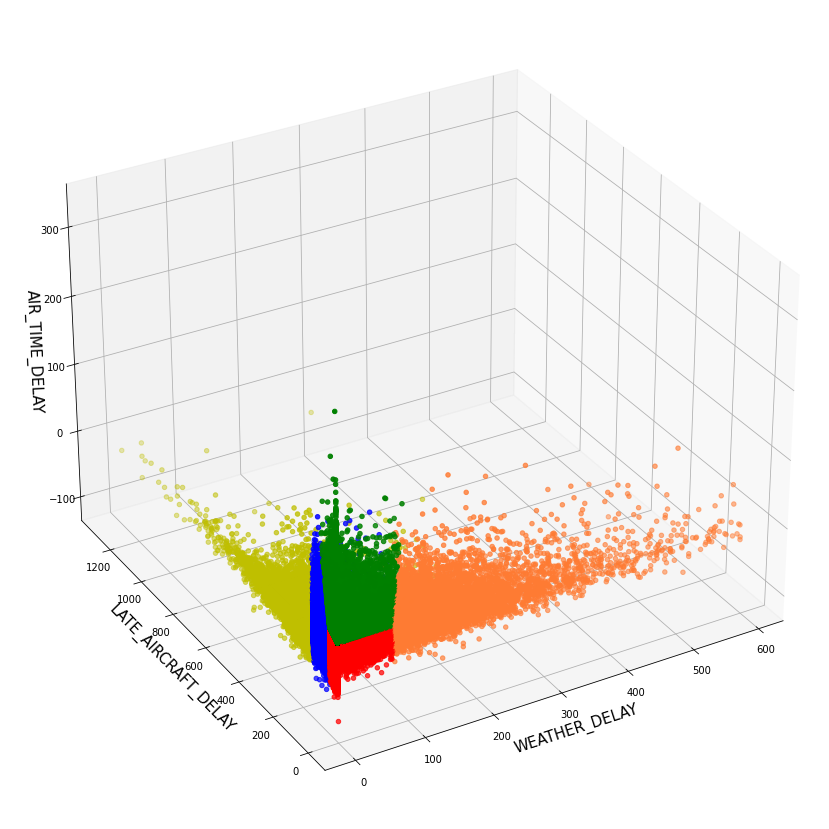

In [58]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'y',
                   2 : 'b',
                   3 : 'g',
                   4 : '#FF7B33'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in clusters]

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
zdata = clustering_dataset["AIR_TIME_DELAY"]
xdata = clustering_dataset["WEATHER_DELAY"]
ydata = clustering_dataset["LATE_AIRCRAFT_DELAY"]

#plt.rcParams['figure.figsize'] = (17, 10)

ax.scatter3D(xdata, ydata, zdata, c=label_color);
ax.view_init(30, -120)

ax.set_xlabel('WEATHER_DELAY', fontsize=15)
ax.set_ylabel('LATE_AIRCRAFT_DELAY', fontsize=15)
ax.set_zlabel('AIR_TIME_DELAY', fontsize=15)

plt.show()

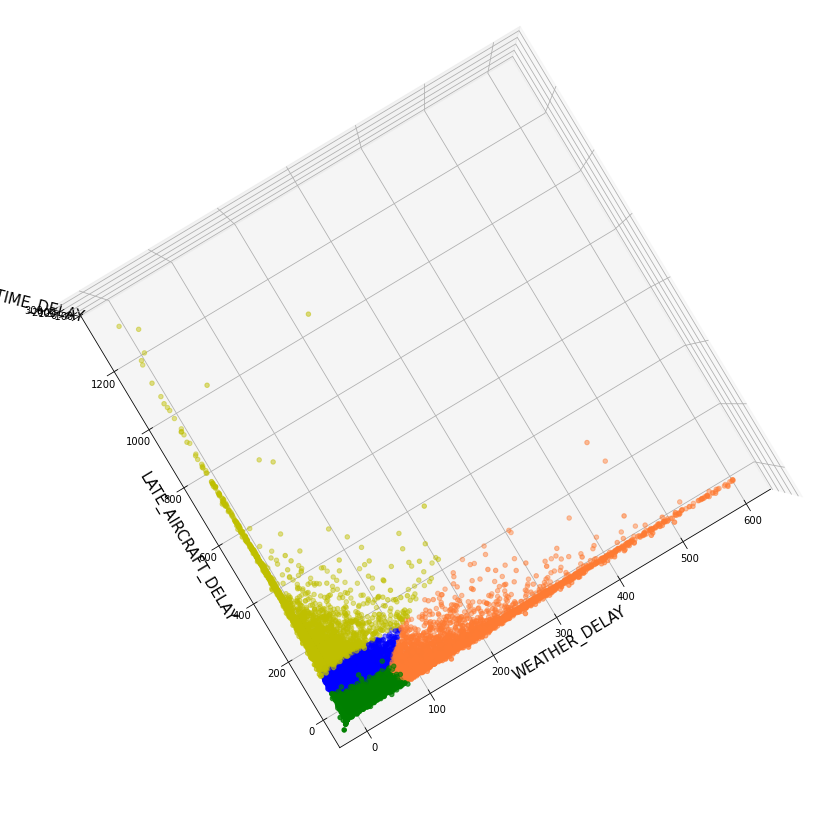

In [59]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=label_color);
ax.view_init(90, -120)
ax.set_xlabel('WEATHER_DELAY', fontsize=15)
ax.set_ylabel('LATE_AIRCRAFT_DELAY', fontsize=15)
ax.set_zlabel('AIR_TIME_DELAY', fontsize=15)


plt.show()

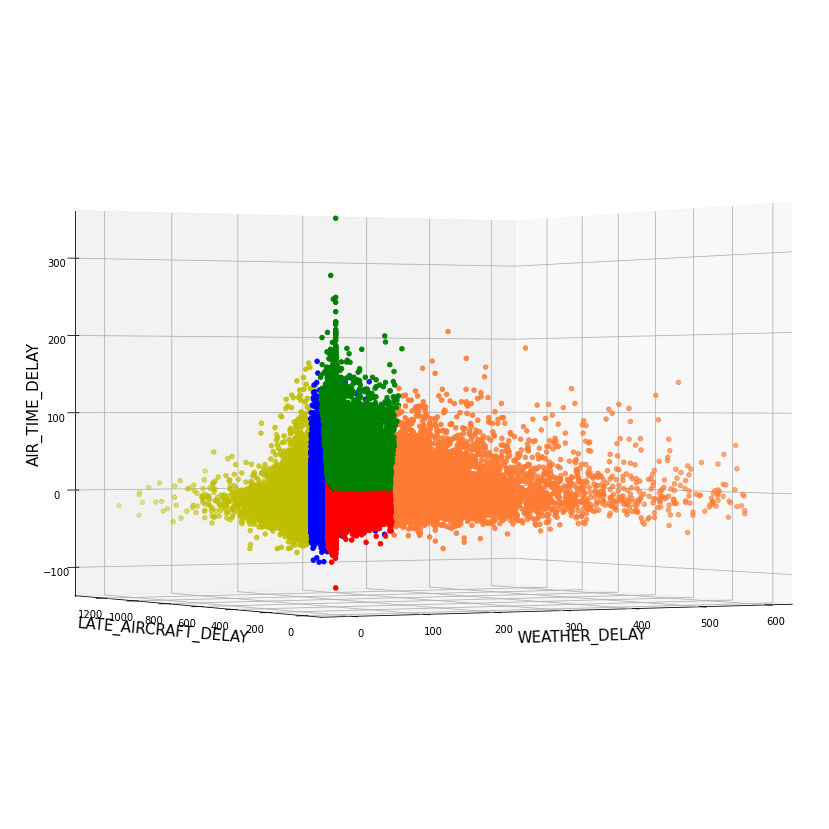

In [60]:
fig = plt.figure(figsize=(15,15))



ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=label_color);
ax.view_init(0, -120)

ax.set_xlabel('WEATHER_DELAY', fontsize=15)
ax.set_ylabel('LATE_AIRCRAFT_DELAY', fontsize=15)
ax.set_zlabel('AIR_TIME_DELAY', fontsize=15)

plt.show()

    Your answer:
    The red cluster (cluster c1), has the most instances in it. The cases in this cluster have very small weather and late aircraft delays and have negative air time delay, meaning that the flight took less time than expected.
    The green cluster (cluster c4), has the second most instances in it. The instances here, although they have similar weather and late aircraft delays with the instances in the c1 cluster, they have larger and positive air time delay, meaning that the actual flight took longer than expected.
    The cluster with the 3rd most instances in it is c2 - the yellow cluster and as we see, compared to the green cluster (c4) the instances here have similar weather delay, although larger late aircraft delay. While their air time delay takes both positive and negative values, meaning that there are instances where the flights are spending more or less time flying than expected.
    Clusters c3 and c5 (indicated with blue and orange colors respectively) have the least amount of instances. They both have instances with positive and negative air time delay values. 
    For the cluster c3 we notice that its instances have weather delay values similar to the ones in the yellow cluster, but they have by far the largest late aircraft delays compared to all the other clusters.
    For the cluster c5, we notice that its instances have the highest weather delay values of all the clusters. While its late aircraft delay values take values similar to the combined yellow and green clusters.
    
    